## Partie II : Prévision de la demande

### Chapitre 1 : Prévision naïve de la demande

In [16]:
# Importation des packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Importation de la base de données
df_forecast = pd.read_csv('Data Formated/Sales2016Clean.csv', parse_dates = ['Purchase_Date'])
df_forecast.dtypes

Unnamed: 0                       int64
Purchase_Date           datetime64[ns]
Purchase_Year_Day                int64
Purchase_Month                   int64
Purchase_Month_Day               int64
Purchase_Week                    int64
Purchase_Week_Day                int64
Inventory_ID                    object
Store_ID                         int64
Product_ID                       int64
Product_Name                    object
Quantity                         int64
Volume_Per_Unit_(ML)             int64
Total_Volume_(ML)                int64
Purchase_Quantity                int64
Selling_Price                  float64
Purchase_Amount                float64
Excise_Tax                     float64
Vendor_ID                        int64
Vendor_Name                     object
dtype: object

In [27]:
# Drop des colonnes pas nécessaires
df_temp = df_forecast.drop(['Unnamed: 0', 'Purchase_Date'], axis = 1)
df_temp

,Purchase_Year_Day,Purchase_Month,Purchase_Month_Day,Purchase_Week,Purchase_Week_Day,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Purchase_Quantity,Selling_Price,Purchase_Amount,Excise_Tax,Vendor_ID,Vendor_Name
0,1,1,1,53,4,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,1,750,750,1,16.49,16.49,0.79,12546,JIM BEAM BRANDS COMPANY
1,1,1,1,53,4,66_EANVERNESS_13795,66,13795,Yellow Tail Tree Free Chard,1,1500,1500,1,9.99,9.99,0.22,4425,MARTIGNETTI COMPANIES
2,1,1,1,53,4,66_EANVERNESS_13793,66,13793,Yellow Tail Svgn Bl,1,1500,1500,1,9.99,9.99,0.22,4425,MARTIGNETTI COMPANIES
3,1,1,1,53,4,28_LARNWICK_3877,28,3877,Smirnoff Green Apple Vodka,1,750,750,1,12.99,12.99,0.79,3960,DIAGEO NORTH AMERICA INC
4,1,1,1,53,4,28_LARNWICK_3878,28,3878,Smirnoff 80 Proof,1,750,750,1,12.99,12.99,0.79,3960,DIAGEO NORTH AMERICA INC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,60,2,29,9,0,17_OLDHAM_36771,17,36771,Yellow Tail Merlot Ausl,1,1500,1500,2,8.95,17.90,0.45,4425,MARTIGNETTI COMPANIES
1048571,60,2,29,9,0,16_LUNDY_26463,16,26463,Ravenswood Vints Blend Znfdl,1,750,750,1,7.99,7.99,0.11,1392,CONSTELLATION BRANDS INC
1048572,60,2,29,9,0,10_HORNSEY_18106,10,18106,Barefoot Cellars Pink Moscat,1,1500,1500,2,11.99,23.98,0.45,3252,E & J GALLO WINERY
1048573,60,2,29,9,0,1_HARDERSFIELD_14701,1,14701,Cupcake Red Velvet,1,750,750,6,7.99,47.94,0.68,9815,WINE GROUP INC


In [30]:
# Data types
df_temp.dtypes

# Problème c'est que l'on ne peut pas utiliser les variables object dans une modèle de prédiction donc faut les modifier en categorical puis en int

Purchase_Year_Day         int64
Purchase_Month            int64
Purchase_Month_Day        int64
Purchase_Week             int64
Purchase_Week_Day         int64
Inventory_ID             object
Store_ID                  int64
Product_ID                int64
Product_Name             object
Quantity                  int64
Volume_Per_Unit_(ML)      int64
Total_Volume_(ML)         int64
Purchase_Quantity         int64
Selling_Price           float64
Purchase_Amount         float64
Excise_Tax              float64
Vendor_ID                 int64
Vendor_Name              object
dtype: object

In [31]:
# Modification des variables objects
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()

df_temp.dtypes

Purchase_Year_Day          int64
Purchase_Month             int64
Purchase_Month_Day         int64
Purchase_Week              int64
Purchase_Week_Day          int64
Inventory_ID            category
Store_ID                   int64
Product_ID                 int64
Product_Name            category
Quantity                   int64
Volume_Per_Unit_(ML)       int64
Total_Volume_(ML)          int64
Purchase_Quantity          int64
Selling_Price            float64
Purchase_Amount          float64
Excise_Tax               float64
Vendor_ID                  int64
Vendor_Name             category
dtype: object

In [32]:
# Modification de category en int
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label] = pd.Categorical(content).codes + 1

df_temp.dtypes

Purchase_Year_Day         int64
Purchase_Month            int64
Purchase_Month_Day        int64
Purchase_Week             int64
Purchase_Week_Day         int64
Inventory_ID              int32
Store_ID                  int64
Product_ID                int64
Product_Name              int16
Quantity                  int64
Volume_Per_Unit_(ML)      int64
Total_Volume_(ML)         int64
Purchase_Quantity         int64
Selling_Price           float64
Purchase_Amount         float64
Excise_Tax              float64
Vendor_ID                 int64
Vendor_Name                int8
dtype: object

In [33]:
df_temp

,Purchase_Year_Day,Purchase_Month,Purchase_Month_Day,Purchase_Week,Purchase_Week_Day,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Purchase_Quantity,Selling_Price,Purchase_Amount,Excise_Tax,Vendor_ID,Vendor_Name
0,1,1,1,53,4,20311,1,1004,3491,1,750,750,1,16.49,16.49,0.79,12546,45
1,1,1,1,53,4,120494,66,13795,6842,1,1500,1500,1,9.99,9.99,0.22,4425,56
2,1,1,1,53,4,120493,66,13793,6840,1,1500,1500,1,9.99,9.99,0.22,4425,56
3,1,1,1,53,4,39420,28,3877,5822,1,750,750,1,12.99,12.99,0.79,3960,26
4,1,1,1,53,4,39421,28,3878,5813,1,750,750,1,12.99,12.99,0.79,3960,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,60,2,29,9,0,16639,17,36771,6826,1,1500,1500,2,8.95,17.90,0.45,4425,56
1048571,60,2,29,9,0,14994,16,26463,5207,1,750,750,1,7.99,7.99,0.11,1392,21
1048572,60,2,29,9,0,534,10,18106,477,1,1500,1500,2,11.99,23.98,0.45,3252,31
1048573,60,2,29,9,0,20619,1,14701,1980,1,750,750,6,7.99,47.94,0.68,9815,116


In [54]:
# Prédiction naïve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Split l'échantillon
X = df_temp.drop(['Purchase_Quantity'], axis = 1)
y = df_temp['Purchase_Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Création du model et prédictions
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9897117789279254

In [62]:
# Évaluons tout de même le RMSE
from sklearn.metrics import root_mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score 

np.random.seed(42)

def RMSLE(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

y_preds = model.predict(X_test)
RMSE = root_mean_squared_error(y_preds, y_test)
RMSLE = RMSLE(y_preds, y_test)
MAE = mean_absolute_error(y_preds, y_test)
R2 = r2_score(y_preds, y_test)

print(RMSE, RMSLE, MAE, R2)

0.36483185919362754 0.004986231405339699 0.004255966430632049 0.9891365597196137


In [43]:
df_temp['Purchase_Quantity'].describe()

count    1.048575e+06
mean     2.337619e+00
std      3.511492e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      4.320000e+02
Name: Purchase_Quantity, dtype: float64

Le score du modèle est parfait mais nous pouvons tout de même améliorer le RMSE car il semble avoir des outliers dans le purchase quantity

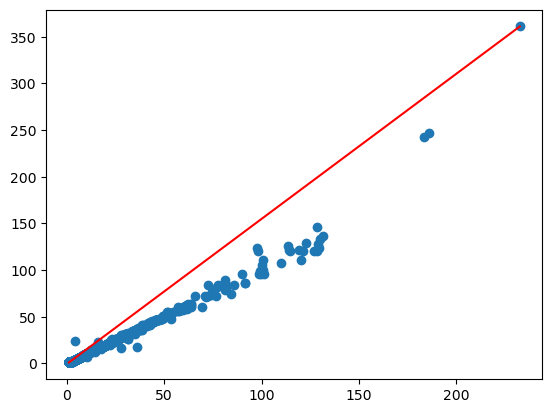

In [76]:
# Graphique des prévisions 
plt.scatter(y_preds, y_test)
plt.plot(np.linspace(y_preds.min(), y_preds.max()), np.linspace(y_test.min(), y_test.max()), color = 'red');

In [103]:
# Création du tableau avec les quantité prédites 
df_pred = pd.DataFrame(X_test['Purchase_Year_Day'])
df_pred.insert(1, 'Forecast', y_preds)

In [104]:
df_pred['Forecast'] = df_pred['Forecast'].astype(int)

In [105]:
df_pred

,Purchase_Year_Day,Forecast
781974,28,1
937737,32,1
907828,31,1
784628,28,1
662460,23,2
...,...,...
673443,23,1
656736,23,2
858501,29,8
617079,22,2


In [106]:
# Création du tableau avec les vraies données
df_test = pd.DataFrame(X_test['Purchase_Year_Day'])
df_test.insert(1, 'Purchase_Quantity', y_test)

In [107]:
df_test

,Purchase_Year_Day,Purchase_Quantity
781974,28,1
937737,32,1
907828,31,1
784628,28,1
662460,23,2
...,...,...
673443,23,1
656736,23,2
858501,29,8
617079,22,2


In [110]:
# Quantitées vendues par jour
preds_test = df_test.groupby(by = 'Purchase_Year_Day')['Purchase_Quantity'] \
                    .agg(['sum'])
preds_test.reset_index(inplace = True)
preds_test.rename(columns = {'sum' : 'Purchase_Quantity'}, inplace = True)
preds_test

,Purchase_Year_Day,Purchase_Quantity
0,1,10208
1,2,18559
2,3,10490
3,4,8226
4,5,8181
5,6,10238
6,7,11851
7,8,19360
8,9,20386
9,10,9362


In [114]:
# Quantitées prédites par jour
preds_preds = df_pred.groupby(by = 'Purchase_Year_Day')['Forecast'] \
                        .agg(['sum'])
preds_preds.reset_index(inplace = True)
preds_preds.rename(columns = {'sum' : 'Forecast'}, inplace = True)
preds_preds

,Purchase_Year_Day,Forecast
0,1,10197
1,2,18521
2,3,10474
3,4,8221
4,5,8179
5,6,10227
6,7,11838
7,8,19317
8,9,20354
9,10,9358


In [117]:
df = pd.DataFrame(preds_test)
df.insert(2, 'Forecast', preds_preds['Forecast'])
df

,Purchase_Year_Day,Purchase_Quantity,Forecast
0,1,10208,10197
1,2,18559,18521
2,3,10490,10474
3,4,8226,8221
4,5,8181,8179
5,6,10238,10227
6,7,11851,11838
7,8,19360,19317
8,9,20386,20354
9,10,9362,9358


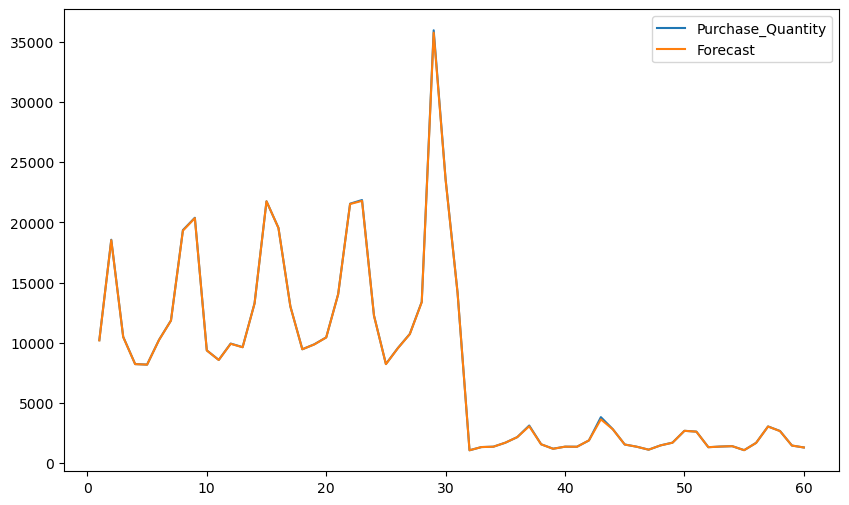

In [120]:
# Plotting prédictions contre vraies valeurs
fig, ax = plt.subplots(figsize = (10,6))
plot = ax.plot(df['Purchase_Year_Day'], df.drop(['Purchase_Year_Day'], axis = 1), label = list(df.drop(['Purchase_Year_Day'], axis = 1).columns))
ax.legend();